In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [158]:
# Read data
df = pd.read_csv("../Dataset/SocialNetworkAds_Dataset.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [159]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


# DATA PREPROCESSING

In [160]:
# Separate features and labels
X = df.drop(labels=["Purchased"], axis=1)
y = df["Purchased"]

In [161]:
# Feaure scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [162]:
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

# DATA PREPARATION

In [163]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

# MODELS

# Batch Gradient Descent

In [164]:
# Define Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [165]:
# Gradient Descent
def batch_gradient_descent(X, y, epochs=100, lr=0.001):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h-y))//m
        theta -= lr*gradient
        loss = -np.mean(y*np.log(h) + (1-y)*np.log(1-h))
        print(f"Loss afer epoch {epoch+1}: {loss}")
    return theta

In [166]:
def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

In [167]:
theta = batch_gradient_descent(X_train, y_train)
y_pred_batch = predict(X_test, theta)
y_pred_batch = [int(i) for i in y_pred_batch]

Loss afer epoch 1: 0.6931471805599453
Loss afer epoch 2: 0.6926649114089276
Loss afer epoch 3: 0.6921832459630564
Loss afer epoch 4: 0.6917021842192523
Loss afer epoch 5: 0.6912217261723844
Loss afer epoch 6: 0.6907418718152689
Loss afer epoch 7: 0.6902626211386697
Loss afer epoch 8: 0.6897839741312985
Loss afer epoch 9: 0.689305930779816
Loss afer epoch 10: 0.6888284910688298
Loss afer epoch 11: 0.6883516549808973
Loss afer epoch 12: 0.6878754224965247
Loss afer epoch 13: 0.6873997935941673
Loss afer epoch 14: 0.68692476825023
Loss afer epoch 15: 0.6864503464390682
Loss afer epoch 16: 0.6859765281329879
Loss afer epoch 17: 0.6855033133022467
Loss afer epoch 18: 0.6850307019150529
Loss afer epoch 19: 0.6845586939375681
Loss afer epoch 20: 0.6840872893339066
Loss afer epoch 21: 0.6836164880661361
Loss afer epoch 22: 0.6831462900942791
Loss afer epoch 23: 0.6826766953763126
Loss afer epoch 24: 0.6822077038681703
Loss afer epoch 25: 0.6817393155237419
Loss afer epoch 26: 0.681271530294875

In [168]:
# Save Batch Gradient Descent Model
joblib.dump(theta, '../Artifacts/Batch_Gradient_Descent_theta.pkl')

['../Artifacts/Batch_Gradient_Descent_theta.pkl']

In [169]:
# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_batch)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_batch)}")

Accuracy: 0.8125

		Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        59
           1       0.60      0.86      0.71        21

    accuracy                           0.81        80
   macro avg       0.77      0.83      0.78        80
weighted avg       0.85      0.81      0.82        80



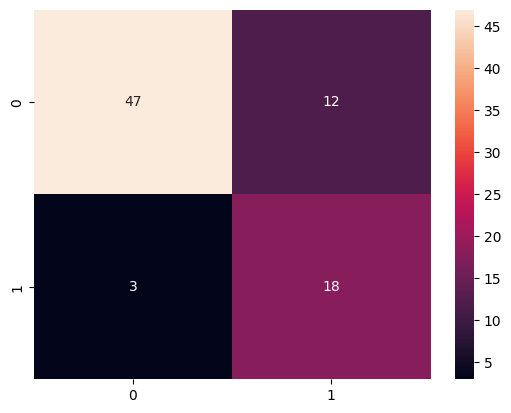

In [170]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_batch)
sns.heatmap(cm,annot=True)
plt.show()

In [171]:
# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_batch)

# AUC Score
auc = roc_auc_score(y_test, y_pred_batch)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.8268765133171914


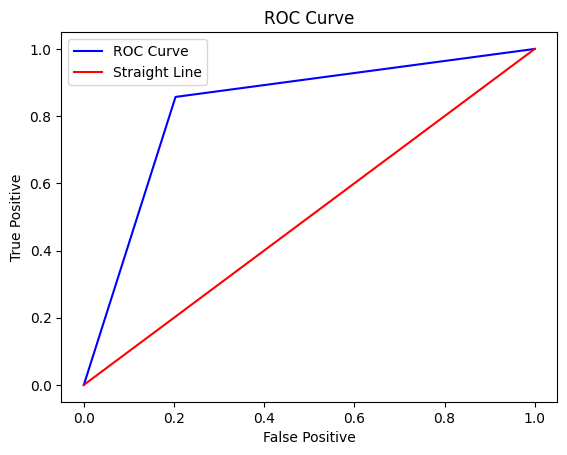

In [172]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Stochastic Gradient Descent

In [173]:
def stochastic_gradient_descent(X, y, epochs=100, lr=0.001):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        loss = 0
        for i in range(m):
            Xi = X[i]
            yi = y[i]
            z = np.dot(Xi, theta)
            h = sigmoid(z)
            gradient = np.dot(Xi.T, (h-yi))
            theta -= lr*gradient
            loss += -np.mean(yi*np.log(h) + (1-yi)*np.log(1-h))
        print(f"Loss after epoch {epoch+1}: {loss/m}")
    return theta

In [174]:
def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

In [175]:
# Ensure X_train and y_train are NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

In [176]:
theta = stochastic_gradient_descent(X_train, y_train)
y_pred_sgd = predict(X_test, theta)
y_pred_sgd = [int(i) for i in y_pred_sgd]

Loss after epoch 1: 0.6747685580002442
Loss after epoch 2: 0.6418467623851287
Loss after epoch 3: 0.6144881797414414
Loss after epoch 4: 0.5916305137541639
Loss after epoch 5: 0.5724059871303824
Loss after epoch 6: 0.556119484888206
Loss after epoch 7: 0.5422195912448816
Loss after epoch 8: 0.5302702438352791
Loss after epoch 9: 0.519926188924386
Loss after epoch 10: 0.5109129956134695
Loss after epoch 11: 0.5030113075160659
Loss after epoch 12: 0.49604464430022854
Loss after epoch 13: 0.4898700272169435
Loss after epoch 14: 0.48437079082619094
Loss after epoch 15: 0.4794510637290831
Loss after epoch 16: 0.47503151565193447
Loss after epoch 17: 0.47104606406421184
Loss after epoch 18: 0.46743930905588177
Loss after epoch 19: 0.4641645229214137
Loss after epoch 20: 0.4611820642810535
Loss after epoch 21: 0.4584581189134724
Loss after epoch 22: 0.45596369351440413
Loss after epoch 23: 0.45367380646890176
Loss after epoch 24: 0.45156683304335654
Loss after epoch 25: 0.4496239723644976
Los

In [177]:
# Save Stochastic Gradient Descent Model
joblib.dump(theta, '../Artifacts/Stochastic_Gradient_Descent_theta.pkl')

['../Artifacts/Stochastic_Gradient_Descent_theta.pkl']

In [178]:
# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_sgd)}")

Accuracy: 0.775

		Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        59
           1       0.54      0.90      0.68        21

    accuracy                           0.78        80
   macro avg       0.75      0.82      0.75        80
weighted avg       0.85      0.78      0.79        80



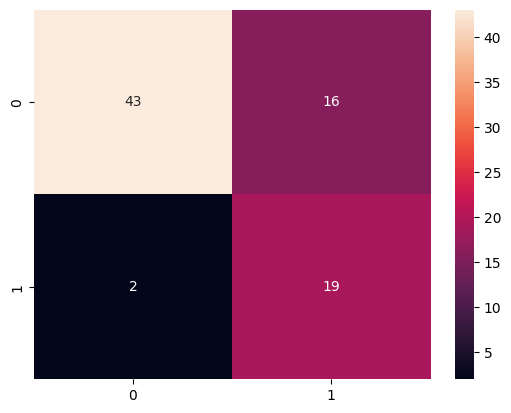

In [179]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm,annot=True)
plt.show()

In [180]:
# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_sgd)

# AUC Score
auc = roc_auc_score(y_test, y_pred_sgd)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.8167877320419694


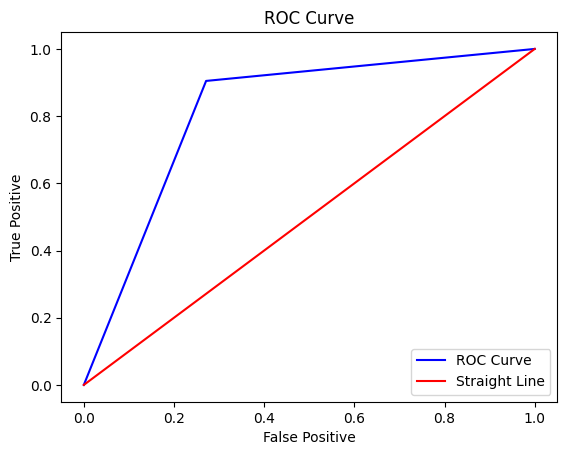

In [181]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Mini Batch Gradient Descent


In [182]:
# Define Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [183]:
# Gradient Descent
def mini_batch_gradient_descent(X, y, epochs=100, lr=0.001, batch_size=32):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        loss=0
        for batch in range(1,(X.shape[0]//batch_size)+1):
            Xi = X[batch_size*(batch-1):batch_size*batch, :]
            yi = y[batch_size*(batch-1):batch_size*batch]
            z = np.dot(Xi, theta)
            h = sigmoid(z)
            gradient = np.dot(Xi.T, (h-yi))//m
            theta -= lr*gradient
            loss += -np.mean(yi*np.log(h) + (1-yi)*np.log(1-h))
        print(f"Loss afer epoch {epoch+1}: {loss/10}")
    return theta

In [184]:
def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

In [185]:
theta = mini_batch_gradient_descent(X_train, y_train)
y_pred_mini_batch = predict(X_test, theta)
y_pred_mini_batch = [int(i) for i in y_pred_mini_batch]

Loss afer epoch 1: 0.6908115166264474
Loss afer epoch 2: 0.6860440552506668
Loss afer epoch 3: 0.6813369391233198
Loss afer epoch 4: 0.6766901273767187
Loss afer epoch 5: 0.6721035587464083
Loss afer epoch 6: 0.667577151686141
Loss afer epoch 7: 0.663110804520114
Loss afer epoch 8: 0.6587043956317464
Loss afer epoch 9: 0.6543577836881167
Loss afer epoch 10: 0.6500708078990152
Loss afer epoch 11: 0.645843288309424
Loss afer epoch 12: 0.6416750261240955
Loss afer epoch 13: 0.6375658040627756
Loss afer epoch 14: 0.6335153867444997
Loss afer epoch 15: 0.6295235210992972
Loss afer epoch 16: 0.6255899368055424
Loss afer epoch 17: 0.6217143467511197
Loss afer epoch 18: 0.6178964475165156
Loss afer epoch 19: 0.6141359198778963
Loss afer epoch 20: 0.6104324293282029
Loss afer epoch 21: 0.6067856266142778
Loss afer epoch 22: 0.6031951482880282
Loss afer epoch 23: 0.5996606172696403
Loss afer epoch 24: 0.59618164342088
Loss afer epoch 25: 0.5927578241265439
Loss afer epoch 26: 0.5893887448821635


In [186]:
# Save Mini Batch Gradient Descent Model
joblib.dump(theta, '../Artifacts/Mini_Batch_Gradient_Descent_theta.pkl')

['../Artifacts/Mini_Batch_Gradient_Descent_theta.pkl']

In [187]:
# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_mini_batch)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_mini_batch)}")

Accuracy: 0.8

		Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        59
           1       0.58      0.86      0.69        21

    accuracy                           0.80        80
   macro avg       0.76      0.82      0.77        80
weighted avg       0.84      0.80      0.81        80



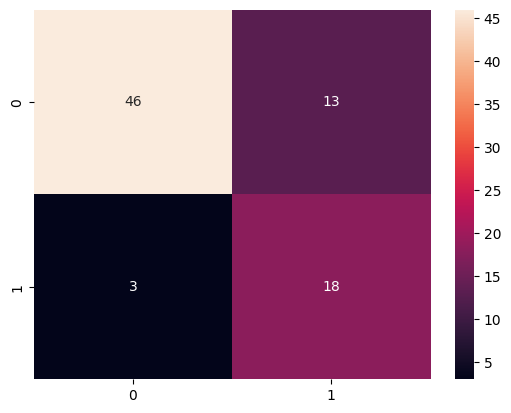

In [188]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_mini_batch)
sns.heatmap(cm,annot=True)
plt.show()

In [189]:
# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_mini_batch)

# AUC Score
auc = roc_auc_score(y_test, y_pred_mini_batch)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.8184019370460048


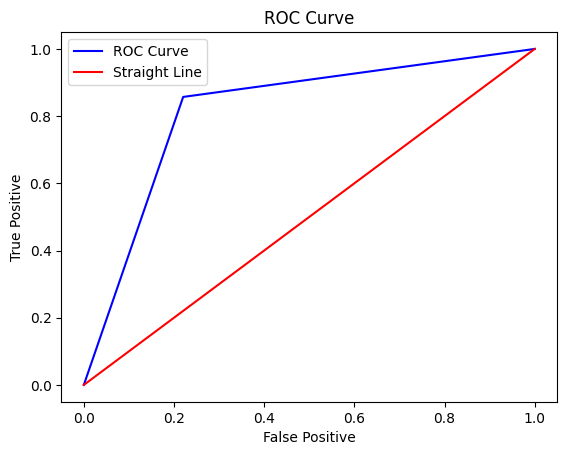

In [190]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Logistic Regression

In [191]:
# Training
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [192]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [193]:
# Mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [194]:
# Gradient of sigmoid function
def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [195]:
# Logistic regression using batch gradient descent
def logistic_regression(X, y, learning_rate=0.001, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []
    for epoch in range(epochs):
        y_pred = sigmoid(np.dot(X, weights) + bias)
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)
        d_weights = (1 / n_samples) * np.dot(X.T, (y_pred - y) * sigmoid_gradient(y_pred))
        d_bias = (1 / n_samples) * np.sum((y_pred - y) * sigmoid_gradient(y_pred))
        weights -= learning_rate * d_weights
        bias -= learning_rate * d_bias
        print(f"Epoch {epoch}: Loss={loss}")
    return weights, bias

In [196]:
# Given data
X = np.array([[3], [5], [8], [1]])
y = np.array([0, 1, 1, 0])

In [197]:
# Train logistic regression model
weights, bias = logistic_regression(X, y, learning_rate=0.01, epochs=100)

Epoch 0: Loss=0.25
Epoch 1: Loss=0.24852373722527005
Epoch 2: Loss=0.2470924459467562
Epoch 3: Loss=0.24570496603733502
Epoch 4: Loss=0.24436014075806226
Epoch 5: Loss=0.24305681971491921
Epoch 6: Loss=0.2417938615082274
Epoch 7: Loss=0.2405701360925473
Epoch 8: Loss=0.23938452686499573
Epoch 9: Loss=0.23823593249983074
Epoch 10: Loss=0.23712326854689492
Epoch 11: Loss=0.23604546881110727
Epoch 12: Loss=0.23500148652968306
Epoch 13: Loss=0.23399029536315002
Epoch 14: Loss=0.2330108902155652
Epoch 15: Loss=0.23206228789860625
Epoch 16: Loss=0.23114352765346083
Epoch 17: Loss=0.23025367154365856
Epoch 18: Loss=0.2293918047312098
Epoch 19: Loss=0.22855703564763474
Epoch 20: Loss=0.22774849607069475
Epoch 21: Loss=0.2269653411168866
Epoch 22: Loss=0.22620674915903088
Epoch 23: Loss=0.22547192167758007
Epoch 24: Loss=0.22476008305359982
Epoch 25: Loss=0.22407048031073173
Epoch 26: Loss=0.2234023828128417
Epoch 27: Loss=0.22275508192347654
Epoch 28: Loss=0.22212789063271574
Epoch 29: Loss=0.

In [198]:
# Prediction
y_pred = lr.predict(X_test)

In [199]:
# Save Logistic Regression Model
joblib.dump(weights, '../Artifacts/Logistic_Regression_weights.pkl')
joblib.dump(bias, '../Artifacts/Logistic_Regression_bias.pkl')

['../Artifacts/Logistic_Regression_bias.pkl']

In [200]:
# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9

		Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        59
           1       0.84      0.76      0.80        21

    accuracy                           0.90        80
   macro avg       0.88      0.86      0.87        80
weighted avg       0.90      0.90      0.90        80



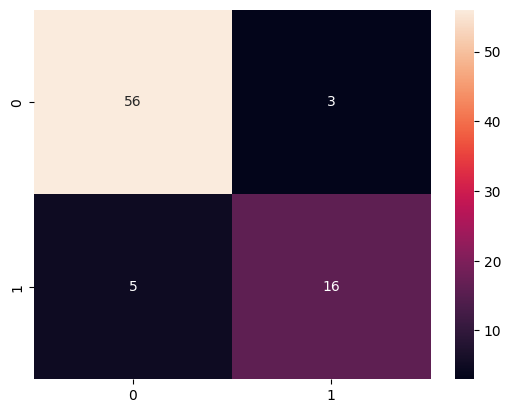

In [201]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [202]:
# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.8555286521388216


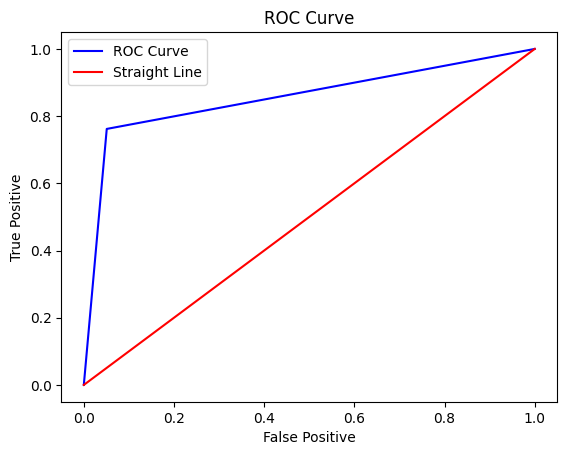

In [203]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

# SAMLE PREDICTION

In [204]:
# Hardcode values for Age and EstimatedSalary
Age = 30
EstimatedSalary = 60000

In [205]:
# Create a new data point with these values
new_data_point = np.array([[Age, EstimatedSalary]])

In [206]:
# Feature scaling on the new data point using the same scaler
new_data_point_scaled = scaler.transform(new_data_point)

In [207]:
# Predict the outcome using the logistic regression model
prediction = lr.predict(new_data_point_scaled)
prediction_proba = lr.predict_proba(new_data_point_scaled)

In [208]:
# Print the prediction and probability
print(f"Predicted Label: {prediction[0]}")
print(f"Probability of each class: {prediction_proba[0]}")

Predicted Label: 0
Probability of each class: [0.94858729 0.05141271]
